# Full Code

In [ ]:
## # AI Training and Testing
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preparation
data = pd.read_table('car_evaluation.csv', sep=',')

# rename each label of the data
data = data.rename(columns={"buy_price":"Price"}) 
data = data.rename(columns={"maintenance_costs":"Maintenance_Cost"})
data = data.rename(columns={"num_doors":"Number_of_Doors"})
data = data.rename(columns={"persons":"Number_of_Persons"})
data = data.rename(columns={"trunk_size":"Trunk_Size"})
data = data.rename(columns={"safety":"Safety"})
data = data.rename(columns={"overall_score":"Overall_Score"})

## Step 2: Data Seperation
alphaNumerical = lambda x: re.sub('[^\w\s]', ' ', x)
lower = lambda x: re.sub(' ', ' ', x.lower())

data['Price'] = data.Price.map(alphaNumerical).map(lower)
data['Maintenance_Cost'] = data.Maintenance_Cost.map(alphaNumerical).map(lower)
data['Number_of_Doors'] = data.Number_of_Doors.map(alphaNumerical).map(lower)
data['Number_of_Persons'] = data.Number_of_Persons.map(alphaNumerical).map(lower)
data['Trunk_Size'] = data.Trunk_Size.map(alphaNumerical).map(lower)
data['Safety'] = data.Safety.map(alphaNumerical).map(lower)
data['Overall_Score'] = data.Overall_Score.map(alphaNumerical).map(lower)


data["Overall_Score"] = data["Overall_Score"].replace({"unacc":"Unacceptable"})
data["Overall_Score"] = data["Overall_Score"].replace({"acc":"Acceptable"})
data["Overall_Score"] = data["Overall_Score"].replace({"vgood":"Very Good"})
data["Overall_Score"] = data["Overall_Score"].replace({"good":"Good"})
data["Overall_Score"] = data["Overall_Score"].replace({"acc":"Acceptable"})


# Declaration and assignment for inputs and outputs variable

# variable for inputs
X = data[['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']]

# variable for outputs
y = data.Overall_Score

# Split the data into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Step 3: Encoding the input data numerically
le = preprocessing.LabelEncoder()

X_train_encoded_Price = pd.DataFrame(le.fit_transform(X_train.Price), columns = ['Price'])
X_train_encoded_Maintenance_Cost = pd.DataFrame(le.fit_transform(X_train.Maintenance_Cost), columns = ['Maintenance_Cost'])
X_train_encoded_Number_of_Doors = pd.DataFrame(le.fit_transform(X_train.Number_of_Doors), columns = ['Number_of_Doors'])
X_train_encoded_Number_of_Persons = pd.DataFrame(le.fit_transform(X_train.Number_of_Persons), columns = ['Number_of_Persons'])
X_train_encoded_Trunk_Size = pd.DataFrame(le.fit_transform(X_train.Trunk_Size), columns = ['Trunk_Size'])
X_train_encoded_Safety = pd.DataFrame(le.fit_transform(X_train.Safety), columns = ['Safety'])

X_train_encoded = pd.concat([X_train_encoded_Price, X_train_encoded_Maintenance_Cost, X_train_encoded_Number_of_Doors, X_train_encoded_Number_of_Persons, X_train_encoded_Trunk_Size, X_train_encoded_Safety], axis = 1, ignore_index = True)
X_train_encoded.columns = ['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']

X_test_encoded_Price = pd.DataFrame(le.fit_transform(X_test.Price), columns = ['Price'])
X_test_encoded_Maintenance_Cost = pd.DataFrame(le.fit_transform(X_test.Maintenance_Cost), columns = ['Maintenance_Cost'])
X_test_encoded_Number_of_Doors = pd.DataFrame(le.fit_transform(X_test.Number_of_Doors), columns = ['Number_of_Doors'])
X_test_encoded_Number_of_Persons = pd.DataFrame(le.fit_transform(X_test.Number_of_Persons), columns = ['Number_of_Persons'])
X_test_encoded_Trunk_Size = pd.DataFrame(le.fit_transform(X_test.Trunk_Size), columns = ['Trunk_Size'])
X_test_encoded_Safety = pd.DataFrame(le.fit_transform(X_test.Safety), columns = ['Safety'])

X_test_encoded = pd.concat([X_test_encoded_Price, X_test_encoded_Maintenance_Cost, X_test_encoded_Number_of_Doors, X_test_encoded_Number_of_Persons, X_test_encoded_Trunk_Size, X_test_encoded_Safety], axis = 1, ignore_index = True)
X_test_encoded.columns = ['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']

## Step 4: Naïve Bayesian Classification Model
model = BernoulliNB()

# train the model
model.fit(X_train_encoded, y_train)

# take the model that was trained on the X_train_encoded data and apply it to X_test_encoded data
y_pred_model = pd.DataFrame(model.predict(X_test_encoded), columns = ['Overall_Score'])

## Step 5: Evaluate the model
%matplotlib inline
cm = confusion_matrix(y_test, y_pred_model)

a, b, c, d = cm[0]
e, f, g, h = cm[1]
i, j, k, l = cm[2]
m, n, o, p = cm[3]

total = a + b + c + d + e + f + g + h + i + j + k + l + m + n + o + p

accuracy = round((a + f + k + p) / total, 5)

precision = round((p + k) / (c + g + k + o + d + h + l + p), 5)
recall = round((p + k) / (i + j + k + l + m + n + o + p), 5)
f1 = round(2 * (precision * recall) / (precision + recall), 5)

## User interface Section
def introduction():
    print("================================================")
    print("Welcome to Car Acceptability Prediction System")
    print("================================================")
    print("Please enjoy~ ")
    
def userInstruction():
    print("================================================")
    print("User Selection")
    print("================================================")
    print("Price Level: low, med, high, vhigh")
    print("Maintenance Cost Level: low, med, high, vhigh")
    print("Number of Doors: 2, 3, 4, 5more")
    print("Number of Persons: 2, 4, more")
    print("Trunk Size: small, med, big")
    print("Safety Level: low, med, high")
    print("Note: lowercase characters only")
    print("================================================")

introduction()

# Ask user to try again
tryAgain = 1
while tryAgain == 1:
    
    # Validate incorrect data
    noError = -1
    while noError == -1:
        # Display user-friendly instructions to users
        userInstruction()

        # Ask user to input data
        inPrice = input("Enter Price level > ")
        inMaintenanceCost = input("Enter Maintenance Cost level > ")
        inDoorNo = input("Enter Number of Doors > ")
        inPersonNo = input("Enter Number of Persons can fit > ")
        inTrunkSize = input("Enter Trunk Size > ")
        inSafety = input("Enter Safety level > ")
        print("================================================")

        # Input data validations
        if (inPrice == "low" or inPrice == "med" or inPrice == "high" or inPrice == "vhigh" and inMaintenanceCost == "low" or inMaintenanceCost == "med" or inMaintenanceCost == "high" or inMaintenanceCost == "vhigh" and inDoorNo == 2 or inDoorNo == 3 or inDoorNo == 4 or inDoorNo == "more" and inPersonNo == 2 or inPersonNo == 4 or inPersonNo == "more" and inTrunkSize == "small" or inTrunkSize == "med" or inTrunkSize == "big" and inSafety == "low" or inSafety == "med" or inSafety == "high"):
            noError = 1
            
        if inPrice != "low" and inPrice != "med" and inPrice != "high" and inPrice != "vhigh":
            print("Please select the correct price level")
            noError = -1

        if inMaintenanceCost != "low" and inMaintenanceCost != "med" and inMaintenanceCost != "high" and inMaintenanceCost != "vhigh":
            print("Please select the correct maintenance cost level")
            noError = -1

        if inDoorNo == "more":
            inDoorNo = "5more"
            
        if inDoorNo != '2' and inDoorNo != '3' and inDoorNo != '4' and inDoorNo != "5more":
            print("Please select the correct number of doors")
            noError = -1

        if inPersonNo != '2' and inPersonNo != '4' and inPersonNo != "more":
            print("Please select the correct number of person")
            noError = -1

        if inTrunkSize != "small" and inTrunkSize != "med" and inTrunkSize != "big":
            print("Please select the correct trunk size")
            noError = -1

        if inSafety != "low" and inSafety != "med" and inSafety != "high":
            print("Please select the correct safety level")
            noError = -1

        

    # Merge data into a table
    inputData = [{'Price': inPrice, 'Maintenance_Cost': inMaintenanceCost, 'Number_of_Doors': inDoorNo, 'Number_of_Persons': inPersonNo, 'Trunk_Size': inTrunkSize, 'Safety': inSafety}]

    result = pd.DataFrame(inputData, columns = ['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety'])

    # Encode the data in the table
    result_encoded_Price = pd.DataFrame(le.fit_transform(result.Price), columns = ['Price'])
    result_encoded_Maintenance_Cost = pd.DataFrame(le.fit_transform(result.Maintenance_Cost), columns = ['Maintenance_Cost'])
    result_encoded_Number_of_Doors = pd.DataFrame(le.fit_transform(result.Number_of_Doors), columns = ['Number_of_Doors'])
    result_encoded_Number_of_Persons = pd.DataFrame(le.fit_transform(result.Number_of_Persons), columns = ['Number_of_Persons'])
    result_encoded_Trunk_Size = pd.DataFrame(le.fit_transform(result.Trunk_Size), columns = ['Trunk_Size'])
    result_encoded_Safety = pd.DataFrame(le.fit_transform(result.Safety), columns = ['Safety'])

    # Merge data into a table again
    result_encoded = pd.concat([result_encoded_Price, result_encoded_Maintenance_Cost, result_encoded_Number_of_Doors, result_encoded_Number_of_Persons, result_encoded_Trunk_Size, result_encoded_Safety], axis = 1, ignore_index = True)
    result_encoded.columns = ['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']

    result_predict_model = pd.DataFrame(model.predict(result_encoded), columns = ['Overall_Score'])
    
    # Display final result to user
    print("Overall Score: ", result_predict_model['Overall_Score'].iloc[0])
    print("================================================")
    
    noError = -1
    while noError == -1:
        tryAgainAns = input("Try again? (Y = Yes, N = No) > ")
        
        if tryAgainAns == 'Y':
            tryAgain = 1
            noError = 1
        elif tryAgainAns == 'N':
            print("Thank you for using this system. See you next time !")
            tryAgain = -1
            noError = 1
        else:
            print("Please select the correct input (Y/N)")
            noError = -1
    




Welcome to Car Acceptability Prediction System
Please enjoy~ 
User Selection
Price Level: low, med, high, vhigh
Maintenance Cost Level: low, med, high, vhigh
Number of Doors: 2, 3, 4, 5more
Number of Persons: 2, 4, more
Trunk Size: small, med, big
Safety Level: low, med, high
Note: lowercase characters only
Enter Price level > Super high
Enter Maintenance Cost level > low
Enter Number of Doors > 2
Enter Number of Persons can fit > 2
Enter Trunk Size > med
Enter Safety level > med
Please select the correct price level
User Selection
Price Level: low, med, high, vhigh
Maintenance Cost Level: low, med, high, vhigh
Number of Doors: 2, 3, 4, 5more
Number of Persons: 2, 4, more
Trunk Size: small, med, big
Safety Level: low, med, high
Note: lowercase characters only
Enter Price level > low
Enter Maintenance Cost level > low
Enter Number of Doors > 2
Enter Number of Persons can fit > 2
Enter Trunk Size > med
Enter Safety level > med
Overall Score:  Unacceptable
Try again? (Y = Yes, N = No) > Y

# Split into steps

# Step 1: Data Preparation

In [1]:
# label each data on the table and separate them to each column
import pandas as pd
data = pd.read_table('car_evaluation.csv', sep=',')

# rename each label of the data
data = data.rename(columns={"buy_price":"Price"}) 
data = data.rename(columns={"maintenance_costs":"Maintenance_Cost"})
data = data.rename(columns={"num_doors":"Number_of_Doors"})
data = data.rename(columns={"persons":"Number_of_Persons"})
data = data.rename(columns={"trunk_size":"Trunk_Size"})
data = data.rename(columns={"safety":"Safety"})
data = data.rename(columns={"overall_score":"Overall_Score"})

In [39]:
# remove words with numbers, punctuation and capital letters
import re

alphaNumerical = lambda x: re.sub('[^\w\s]', ' ', x)
lower = lambda x: re.sub(' ', ' ', x.lower())

data['Price'] = data.Price.map(alphaNumerical).map(lower)
data['Maintenance_Cost'] = data.Maintenance_Cost.map(alphaNumerical).map(lower)
data['Number_of_Doors'] = data.Number_of_Doors.map(alphaNumerical).map(lower)
data['Number_of_Persons'] = data.Number_of_Persons.map(alphaNumerical).map(lower)
data['Trunk_Size'] = data.Trunk_Size.map(alphaNumerical).map(lower)
data['Safety'] = data.Safety.map(alphaNumerical).map(lower)
data['Overall_Score'] = data.Overall_Score.map(alphaNumerical).map(lower)


data["Overall_Score"] = data["Overall_Score"].replace({"unacc":"Unacceptable"})
data["Overall_Score"] = data["Overall_Score"].replace({"acc":"Acceptable"})
data["Overall_Score"] = data["Overall_Score"].replace({"vgood":"Very Good"})
data["Overall_Score"] = data["Overall_Score"].replace({"good":"Good"})
data["Overall_Score"] = data["Overall_Score"].replace({"acc":"Acceptable"})

data

,Price,Maintenance_Cost,Number_of_Doors,Number_of_Persons,Trunk_Size,Safety,Overall_Score
0,vhigh,vhigh,2,2,small,low,unacceptable
1,vhigh,vhigh,2,2,small,med,unacceptable
2,vhigh,vhigh,2,2,small,high,unacceptable
3,vhigh,vhigh,2,2,med,low,unacceptable
4,vhigh,vhigh,2,2,med,med,unacceptable
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,Good
1724,low,low,5more,more,med,high,very good
1725,low,low,5more,more,big,low,unacceptable
1726,low,low,5more,more,big,med,Good


# Step 2: Data separation (For Training and Testing set)

In [3]:
# split the data into feature and label

# variable for inputs
X = data[['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']]

# variable for outputs
y = data.Overall_Score


## Split the data

In [6]:
# Split the data into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



# Step 3: Encode the input data numerically

In [26]:
from sklearn import preprocessing


# Create a label encoder
le= preprocessing.LabelEncoder()

X_train_encoded_Price = pd.DataFrame(le.fit_transform(X_train.Price), columns = ['Price'])
X_train_encoded_Maintenance_Cost = pd.DataFrame(le.fit_transform(X_train.Maintenance_Cost), columns = ['Maintenance_Cost'])
X_train_encoded_Number_of_Doors = pd.DataFrame(le.fit_transform(X_train.Number_of_Doors), columns = ['Number_of_Doors'])
X_train_encoded_Number_of_Persons = pd.DataFrame(le.fit_transform(X_train.Number_of_Persons), columns = ['Number_of_Persons'])
X_train_encoded_Trunk_Size = pd.DataFrame(le.fit_transform(X_train.Trunk_Size), columns = ['Trunk_Size'])
X_train_encoded_Safety = pd.DataFrame(le.fit_transform(X_train.Safety), columns = ['Safety'])

X_train_encoded = pd.concat([X_train_encoded_Price, X_train_encoded_Maintenance_Cost, X_train_encoded_Number_of_Doors, X_train_encoded_Number_of_Persons, X_train_encoded_Trunk_Size, X_train_encoded_Safety], axis = 1, ignore_index = True)
X_train_encoded.columns = ['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']

X_test_encoded_Price = pd.DataFrame(le.fit_transform(X_test.Price), columns = ['Price'])
X_test_encoded_Maintenance_Cost = pd.DataFrame(le.fit_transform(X_test.Maintenance_Cost), columns = ['Maintenance_Cost'])
X_test_encoded_Number_of_Doors = pd.DataFrame(le.fit_transform(X_test.Number_of_Doors), columns = ['Number_of_Doors'])
X_test_encoded_Number_of_Persons = pd.DataFrame(le.fit_transform(X_test.Number_of_Persons), columns = ['Number_of_Persons'])
X_test_encoded_Trunk_Size = pd.DataFrame(le.fit_transform(X_test.Trunk_Size), columns = ['Trunk_Size'])
X_test_encoded_Safety = pd.DataFrame(le.fit_transform(X_test.Safety), columns = ['Safety'])

X_test_encoded = pd.concat([X_test_encoded_Price, X_test_encoded_Maintenance_Cost, X_test_encoded_Number_of_Doors, X_test_encoded_Number_of_Persons, X_test_encoded_Trunk_Size, X_test_encoded_Safety], axis = 1, ignore_index = True)
X_test_encoded.columns = ['Price', 'Maintenance_Cost', 'Number_of_Doors', 'Number_of_Persons', 'Trunk_Size', 'Safety']

X_test_encoded

,Price,Maintenance_Cost,Number_of_Doors,Number_of_Persons,Trunk_Size,Safety
0,0,0,2,0,1,0
1,2,1,0,1,1,2
2,0,0,3,0,0,2
3,1,0,3,1,1,2
4,2,1,2,2,1,1
...,...,...,...,...,...,...
514,0,3,2,0,1,2
515,2,1,3,0,0,0
516,3,2,2,1,0,0
517,1,1,0,2,2,2


# Step 4: Naïve Bayesian Classification Method

In [27]:
# Use a logistic regression model
from sklearn.naive_bayes import BernoulliNB
import numpy as np

model = BernoulliNB()

# Train the model
model.fit(X_train_encoded, y_train)

# Take the model that was trained on the X_train_encoded data and apply it to X_test_encoded data
y_pred_model = pd.DataFrame(model.predict(X_test_encoded), columns = ['Overall_Score'])

# List of predictions
y_pred_model

,Overall_Score
0,Unacceptable
1,Unacceptable
2,Unacceptable
3,Unacceptable
4,Unacceptable
...,...
514,Unacceptable
515,Unacceptable
516,Acceptable
517,Unacceptable


# Step 5: Evaluate the model

Accuracy: 0.75337
Precision: 0.81043
Recall: 0.89529
F1: 0.85075


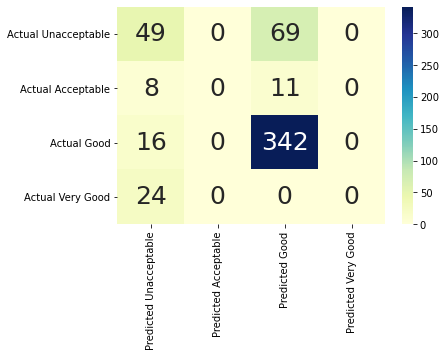

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
cm = confusion_matrix(y_test, y_pred_model)

sns.heatmap(cm, xticklabels=['Predicted Unacceptable', 'Predicted Acceptable', 'Predicted Good', 'Predicted Very Good'], yticklabels=['Actual Unacceptable', 'Actual Acceptable', 'Actual Good', 'Actual Very Good'],
annot=True, fmt='d', annot_kws={'fontsize':25}, cmap="YlGnBu");

a, b, c, d = cm[0]
e, f, g, h = cm[1]
i, j, k, l = cm[2]
m, n, o, p = cm[3]

total = a + b + c + d + e + f + g + h + i + j + k + l + m + n + o + p

accuracy = round((a + f + k + p) / total, 5)

precision = round((p + k) / (c + g + k + o + d + h + l + p), 5)
recall = round((p + k) / (i + j + k + l + m + n + o + p), 5)
f1 = round(2 * (precision * recall) / (precision + recall), 5)

print("Accuracy:", accuracy);
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
